# __ Travail personnel 1 - MATH-F314__ 

# __ BA3 Physique : Saerens Henri et Musibau Solomon__

# __Question 1:__

Nous allons tout d'abord résoudre les équations du mouvement pour notre problème Terre-Lune dans le repère fixe par rapport à la Terre. Pour cela, il faut prendre en compte le fait que la Terre exerce une force d'attraction sur la lune et vice-versa, ce qui implique que le repère de la Terre n'est pas inertiel. Il faut également prendre en compte le fait que le centre de masse ne se trouve pas au centre de la Terre (ce qui impliquerait que la Terre est infiniment lourde) mais bien quelque part entre la Lune et la Terre. Introduisons donc la position de la Terre et de la Lune par rapport au repère inertiel, noté $\vec{x_{T}}$ et $\vec{x_{L}}$ restpectivement. Par le cours de mécanique analytique de deuxième année (Voir syllabus de Pierre Gaspard), on a les résultats suivants: la position du centre de masse $\vec{R}$: 

$$\vec{R}=\frac{m_{L}\vec{x_{L}}+m_{T}\vec{x_{T}}}{m_{L}+m_{T}}$$
où $m_{L}$ est la masse de la Lune et $m_{T}$ est la masse de la Terre et aussi: 

$$\vec{x_{L}}=\vec{R}+\frac{m_{T}}{m_{T}+m_{L}}\vec{r}$$ 

$$\vec{x_{T}}=\vec{R}-\frac{m_{L}}{m_{T}+m_{L}}\vec{r}$$

où le vecteur $\vec{r}$ est le vecteur de la position relative de la Lune par rapport à la Terre. On peut l'exprimer en terme des positions de la Terre et de la Lune par rapport au repère inertiel de la manière suivante: $$\vec{r}=\vec{x_{L}}-\vec{x_{T}}$$

En dérivant cette dernière équation par rapport au temps, on a: $$\overset{..}{\vec{r}}=\overset{..}{\vec{x_{L}}}-\overset{..}{\vec{x_{T}}}$$

Par la loi fondamentale de la dynamique $\vec{F}=m\vec{a}$ et par l'expression de la force gravitationnelle qui s'exerce entre deux corps massifs ($G$ est la constante gravitationnelle), on a : 

$$\vec{F}_{1,2}=-\vec{F}_{2,1}=-\frac{G m_{1} m_{2} \vec{r}}{r^3}$$ 

$$\overset{..}{\vec{x_{L}}}=-\frac{G m_{T} \vec{r}}{r^3}$$ 

$$\overset{..}{\vec{x_{T}}}=\frac{G m_{L} \vec{r}}{r^3}$$

Or on a $\overset{..}{\vec{r}}=\overset{..}{\vec{x_{L}}}-\overset{..}{\vec{x_{T}}}$, et en projettant nos équations sur les axes $x$ et $y$, on trouve: 

$$\overset{..}{x}=\overset{.}{v}_{x}=-\frac{G  (m_{T}+m_{L}) x}{(x^2 + y^2)^{3/2}}$$ et $$\overset{..}{y}=\overset{.}{v}_{y}=-\frac{G  (m_{T}+m_{L}) y}{(x^2 + y^2)^{3/2}}$$ 

où $v_{x}$ et $v_{y}$ représentent la variation du vecteur $\vec{r}$ par rapport au temps selon les axes $x$ et $y$.

Ainsi, nous pouvons maintenant obtenir notre équation différentielle vectorielle $\overset{.}{u}=f(u)$ qui va être utile pour la résolution numérique : 

$$ \overset{.}{u}= \begin{pmatrix} \overset{.}{v}_{x} \\ \overset{.}{v}_{y} \\ \overset{.}{x} \\ \overset{.}{y} \end{pmatrix} = \begin{pmatrix} -\frac{G  (m_{T}+m_{L}) x}{(x^2 + y^2)^{3/2}} \\ -\frac{G  (m_{T}+m_{L}) y}{(x^2 + y^2)^{3/2}} \\ v_{x} \\ v_{y} \end{pmatrix} = f(u) $$
Résolvons à présent ces équations à l'aide de la méthode de Runge-kutta-4. 

In [55]:
from math import sin, cos, acos, log, ceil, sqrt #on importe les outils mathématiques nécessaires pour notre implémentation
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

On considère qu'au temps $t=0s$, la Lune se trouve au périgée de la trajectoire.

In [56]:
#On introduit les constantes et les conditions initiales fournies :
G = 6.67408*10**(-11)          #constante gravitationnelle
MT = 5.972*10**24              #masse de la Terre ( en kg)
ML = 7.348*10**22              #masse de la Lune ( en kg)
vy0 = 1083.434974              #vitesse initiale de la Lune selon l'axe y (en m/s)(on se met dans le repère fixe par rapport à la Terre)
vx0 = 0.0                      #vitesse initiale de la Lune selon l'axe x (en m/s)
x0= -362600000.0               #position initiale de la Lune selon l'axe x (en m) 
y0= 0.0                        #position initiale de la Lune selon l'axe y (en m) 

In [57]:
#On définit notre fonction f(u): 
def f(u):     #prend en argument un tableau u qui contient la solution au temps t, et retourne un tableau f(u)
    
    vx=u[0]
    vy=u[1]
    x=u[2]
    y=u[3]
    
    return numpy.array([-(G*(MT+ML)*x)/(x**2 + y**2)**(3/2),-(G*(MT+ML)*y)/(x**2 + y**2)**(3/2),vx,vy]) 

On implémente à présent la méthode de calcul numérique __Runge-kutta-4 (RK4)__ fournie sur le site, https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods, qui nous permet d'approximer la fonction $u$ à un temps t quelconque. 

In [58]:
def rk4_step(u,f,dt):            #On définit rk4_step qui prend en argument le tableau, la fonction f, et un intervalle de temps dt.
                                 #Cette fonction retourne la valeur approximée de u au temps t+dt.
                                 #Remarque : La différence avec la méthode donnée dans le lien ci-dessus est que notre fonction f(u)
                                 #ne dépend pas explicitement du temps.
    k1=f(u)
    k2=f(u+ dt*0.5*k1)
    k3=f(u+dt*0.5*k2)
    k4=f(u+dt*k3)
    
    return u + dt*(1/6)*(k1 + 2*k2 + 2*k3 + k4) 

In [59]:
#Nous calculons les valeurs de u jusqu'à un temps T de 28jours (par culture générale, on sait que c'est
#une valeur correcte pour la période de révolution)  avec un intervalle de temps dt de 1s.

T = 28*24*3600.0                                  #en seconde
dt = 1.0                                          #en seconde
N= int(T/dt) + 1                                  # nombre d'étapes de temps

u_rk4 = numpy.empty((N,4))                        #on construit une matrice qui va contenir les N solutions pour chaque itération de rk4

u_rk4[0]= numpy.array([vx0,vy0,x0,y0])            #On pose nos conditions initiales (à t=0) (1ère ligne de la matrice u_rk4)

for n in range(N-1):                              #Calcul de tous les éléments de notre matrice via une boucle for
    
    u_rk4[n+1] = rk4_step(u_rk4[n], f, dt)

In [60]:
#On créé un tableau pour chacune des variables du vecteur u qui contiennent les solutions de chaque itération.
vx_rk4= u_rk4[:,0]
vy_rk4= u_rk4[:,1]
x_rk4 = u_rk4[:,2]
y_rk4 = u_rk4[:,3]

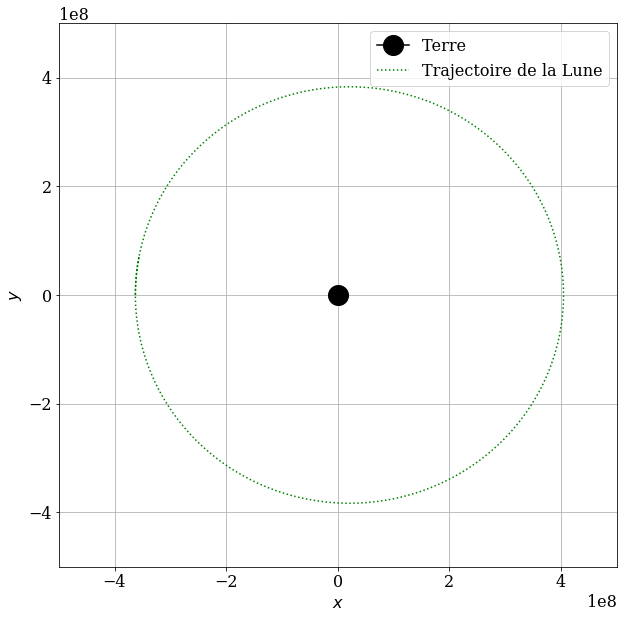

In [61]:
#Nous représentons la trajectoire de la lune par rapport à la position de la Terre (qui se trouve en (0,0))
pyplot.figure(figsize=(10,10))
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$') 
pyplot.plot(0, 0, marker='o', color='k', markersize=20, label='Terre' ) # ==>on ajoute cette ligne de code pour avoir une
#Attention : la Terre représentée ici n'est pas à l'échelle !! 
pyplot.plot(x_rk4, y_rk4,'g:', label='Trajectoire de la Lune')          #représentation de la Terre
pyplot.xlim(-5.0*10**8,5.0*10**8)             #on adapte les limites de nos axes pour avoir une bonne vision de la trajectoire
pyplot.ylim(-5.0*10**8,5.0*10**8)
pyplot.legend();

On observe donc bien que le mouvement de la Lune autour de la Terre est décrit par une ellipse. 
Vérifions à présent si l'excentricité de notre ellipse calculée numériquement est compatible avec la valeur théorique donnée dans l'énoncé : $\epsilon= 0.0549006$.

Pour calculer la valeur de l'excentricité, on part de l'équation :

$$ r(\theta)=\frac{r_{min}(1+\epsilon)}{1 + \epsilon cos(\theta)}$$

où $r(\theta)$ est la distance Terre-Lune (en m), $\theta$ est l'angle comme représenté sur la figure de l'énoncé, $r_{min}$ est la distance minimale Terre-Lune ( qui ici correspond à notre |$x_{0}$|).

À partir de cette formule, on va isoler $\epsilon$, ce qui nous donne : $$\epsilon = \frac{r_{min} - r(\theta)}{r(\theta)cos(\theta) - r_{min}}$$

Or $$r(\theta)=\sqrt{x^2+y^2}$$ De plus, dans notre problème, on a : $$x=-r(\theta)cos(\theta)$$ et donc $$\theta=acos(-\frac{x}{r(\theta)})$$
Implémentons cela :

In [62]:
#calcul de chaque valeur de r en fonction de x et y
r_rk4= numpy.empty(N)    #tableau contenant les valeurs de r
for i in range(N):
    r_rk4[i]=sqrt((x_rk4[i]**2+y_rk4[i]**2))

In [63]:
#calcul de chaque valeur de theta en fonction de son r correspondant
angle_rk4=numpy.empty(N)      #tableau contenant les valeurs de l'angle
for i in range(N):
    angle_rk4[i]=acos(-x_rk4[i]/r_rk4[i])

Maintenant qu'on à toutes nos valeurs de $r(\theta)$ et $\theta$, nous pouvons calculer (N-1) valeurs de $\epsilon$ (on ne calcule pas $\epsilon$ pour les conditions initiales car on obtient une indétermination), et nous allons moyenner sur l'ensemble de ces valeurs pour obtenir un $\epsilon$ moyen:

In [64]:
#on calcul notre excentricité moyenne
somme=0.0
for i in range (1,N):
    somme=((r_rk4[0]-r_rk4[i])/(r_rk4[i]*cos(angle_rk4[i])-r_rk4[0]))+somme    #r_rk4[0]=r(min) ici
    
excentricité_rk4=(1/(N-1))*somme
print('excentricité=', excentricité_rk4)

excentricité= 0.0544594284542


On obtient donc une valeur de l'excentricité qui n'est pas exactement celle de la valeur théorique à quelques décimales près. Cette erreur est probablement dû au fait que la méthode de calcul numérique RK4 engendre une petite erreur à chaque itération. Notons que cette faible valeur de l'exentricité explique la forme de notre ellipse. En effet, pour une excentricité proche de 0, la trajectoire se rapproche d'un mouvement circulaire.

__ Remarque:__ À la question 2, nous calculerons l'excentricité d'une autre manière, c'est-à-dire à partir des valeurs de a et b (demi grand axe et demi petit axe) et nous verrons que l'on peut obtenir une valeur de l'excentricité plus précise. En effet, ici on calcul des valeurs de l'excentricité sur toute la trajectoire et ensuite on fait une moyenne : il y a de plus fortes chances que des erreurs se soient propagées tout au long de cette trajectoire. 

# __Question 2:__

Maintenant, calculons numériquement les valeurs  du demi grand $a$ et du demi petit axe $b$.

Pour calculer les valeurs de a et de b, on utilise la géométrie du problème:  le demi grand axe $a$ correspond a la moitié de la distance entre l'apogée et le périgé de notre ellipse, tandis que pour le demi petit axe $b$ cela correspond à la moitié de la distance entre les extremums (min et max) de nos valeurs de y.

In [65]:
#on cherche le maximum de nos valeurs de x
x_rk4_max=x_rk4[0]
for i in range (N-1):
    if x_rk4[i+1]>x_rk4_max:
        x_rk4_max=x_rk4[i+1]
        
#on cherche le minimum de nos valeurs de x
x_rk4_min=x_rk4[0]
for i in range (N-1):
    if x_rk4[i+1]<x_rk4_min:
        x_rk4_min=x_rk4[i+1]
        
#on cherche le maximum de nos valeurs de y
y_rk4_max=y_rk4[0]
for i in range (N-1):
    if y_rk4[i+1]>y_rk4_max:
        y_rk4_max=y_rk4[i+1]
        
#on cherche le minimum de nos valeurs de y
y_rk4_min=y_rk4[0]
for i in range (N-1):
    if y_rk4[i+1]<y_rk4_min:
        y_rk4_min=y_rk4[i+1]
                                 #Pour les deux demi axes, on calcule la moitié de la distance séparant les extrémums
a1=(x_rk4_max - x_rk4_min)/2     #on prend un signe négatif car étant donné notre repère fixe par rapport à la Terre, on sait 
b1=(y_rk4_max - y_rk4_min)/2     #que nos valeurs minimales sont négatives
                                 # les valeurs de a1 et b1 sont en mètres, on les transforme en km
print('La valeur de a1 en km=',a1/1000)
print('La valeur de b1 en km=',b1/1000)

La valeur de a1 en km= 383663.116433
La valeur de b1 en km= 383084.497255


Comparons ces résultats aux valeurs théoriques. Si on se réfère au cours de mécanique analytique de Pierre Gaspard de BA2-physique, on a les résultats suivants: $$r=\frac{p}{1+\epsilon cos(\theta)}$$

où r est la distance radiale Terre-Lune (pour ce cas-ci) et $\theta$ le même angle que décrit auparavant. De plus, on a:

$$a=\frac{p}{1-\epsilon^2}$$ et $$b=\frac{p}{\sqrt{1-\epsilon^2}}$$ 

Si nous comparons avec notre équation pour $r(\theta)$ précédente, on voit que:

$$p=r_{min}(1+\epsilon)$$

Calculons à présent $a$ et $b$:

In [66]:
epsilon=0.0549006
r_min=362600000
a2=(r_min*(1+epsilon))/(1-epsilon**2)
b2=(r_min*(1+epsilon))/(sqrt(1-epsilon**2))

print('La valeur de a2 en km=',a2/1000)         #a2 et b2 sont en mètres, on les transforme en km
print('La valeur de b2 en km=',b2/1000)

La valeur de a2 en km= 383663.3480033952
La valeur de b2 en km= 383084.71644280216


Comme indiqué à la question précédente, nous allons calculer à nouveau la valeur de $\epsilon$ numériquement mais avec les valeurs de $a1$ et $b1$ et allons comparer les résultats. A nouveau, dans le cours de mécanique analytique de deuxième année, on a vu la formule suivante pour l'excentricité: 


$$\epsilon=\sqrt{\frac{a^2-b^2}{a^2}}$$

Calculons donc l'excentricité:

In [67]:
excentricite_a_b= sqrt((a1**2-b1**2)/a1**2)
print(excentricite_a_b)

0.05490002956183703


Comme annoncé à la question précédente, nous obtenons une valeur de l'excentricité plus précise que la première qui a été calculée à l'aide d'une moyenne sur un grand nombre de valeurs. Si cette valeur est plus précise, c'est probablement dû au fait que dans ce cas-ci, nous n'avons pas calculé l'excentricité à l'aide de toute les valeurs de la trajectoire mais bien à l'aide de deux valeurs seulement sur lesquelles l'erreur, dûe à la méthode numérique, a eu moins le temps de se propager et a donc eu moins d'impact sur la valeur finale.

# __Question 3:__

Nous allons calculer à présent la période de révolution de la Lune autour de la Terre. 

In [68]:
id_ynegatif=numpy.where(y_rk4<0.0)[0]  #On prends tous les indices des y dont la valeur est négative et on les mets dans un tableau
s=numpy.empty(N)                       #on créé un tableau 
for i in range(id_ynegatif[0],N):      #On remplit notre tableau avec les valeurs de y dont l'indice est compris entre id_ynegatif[0] et N.
    s[i]=y_rk4[i]
s_positif=numpy.where(s>0.0)[0]        #parmis ce tableau s, on prend les indices dont la valeur de y est positive.

periode_secondes = s_positif[0]        #par geométrie du problème et le fait que dt=1s, le 1er élement de s_positif correspond 
                                       #à la période en seconde de la révolution (la Lune fait un tour complet)
periode_jours = periode_secondes/86400.0  #Obtenir la période en jour
print('periode en seconde=',periode_secondes)
print('periode en jour =',periode_jours)

periode en seconde= 2350682
periode en jour = 27.2069675926


On peut comparer cette valeur à la valeur théorique de la période $T$ qui est donnée (Voir syllabus de Pierre Gaspard : Mécanique analytique) par:

$$T=\frac{2\pi a^{3/2}}{\sqrt{G(m_{L}+m_{T})}}$$ 

où $G$ est la constante gravitationnelle et $a$ est le demi grand axe calculé théoriquement. 

In [69]:
T_seconde=(2*numpy.pi*a2**(3/2))/(sqrt(G*(ML+MT)))
print('T en seconde=', T_seconde)
T_jour=T_seconde/86400.0
print('T en jour=', T_jour)

T en seconde= 2350683.9301896757
T en jour= 27.206989932750876


De nouveau, les périodes calculées numériquement et théoriquement sont relativement proches. 

# __Question 4:__

Nous allons calculer l'ordre de convergence de la méthode Runge-Kutta-4 en s'inspirant du calcul de l'ordre de convergence de RK2 (Dans le module 1 du cours) :

In [70]:
dt_values = numpy.array([40000.0,20000.0, 4000.0, 2000.0, 400.0]) #on créé un tableau pour différentes valeurs de dt qui décroissent

u_values = numpy.empty_like(dt_values, dtype=numpy.ndarray) #on créé un tableau de matrice qui contient les valeurs de u pour chaque dt

for i, dt in enumerate(dt_values):      #pour chaque valeur de dt, on calcule la fonction u via RK4
    
    N = int(T/dt) + 1                   #nombre d'étapes de temps

    
    u = numpy.empty((N, 4))             #on créé une matrice de taille N x 4 qui contiendra les solutions à chaque étape
    u[0] = numpy.array([vx0, vy0, x0, y0]) #on pose les conditions initiales

    for n in range(N-1):
       
        u[n+1] = rk4_step(u[n], f, dt)  #on remplit notre tableau u
    
    u_values[i] = u                     #pour chaque dt, on remplit un élément de u_values par la matrice u

In [71]:
#On définit la fonction qui va nous donner différence en norme L_1 entre notre calcul de u le plus précis (u_fine) (dt plus petit)
#et les autres calculs de u qui correspondent à des valeurs de dt plus grandes (u_current).
def get_diffgrid(u_current, u_fine, dt): 
    
    N_current = len(u_current[:,0])
    N_fine = len(u_fine[:,0])
   
    grid_size_ratio = ceil(N_fine/N_current)
    
    diffgrid = dt*numpy.sum(numpy.abs(u_current[:,2]- u_fine[::grid_size_ratio,2])) 
    
    return diffgrid

In [72]:
#calcul la différence entre une solution u_current et la solution la plus précise u_fine (dt = 400.0)
diffgrid = numpy.empty_like(dt_values)     #on créé un tableau de la même que dt_values

for i, dt in enumerate(dt_values):         #une boucle for pour évaluer sur chaque dt

    diffgrid[i] = get_diffgrid(u_values[i], u_values[-1], dt)  

In [20]:
print(diffgrid[0])
print(diffgrid[1])
print(diffgrid[2])
print(diffgrid[3])
print(diffgrid[4])

9471534334.03
508477121.084
710755.659382
43547.7482224
0.0


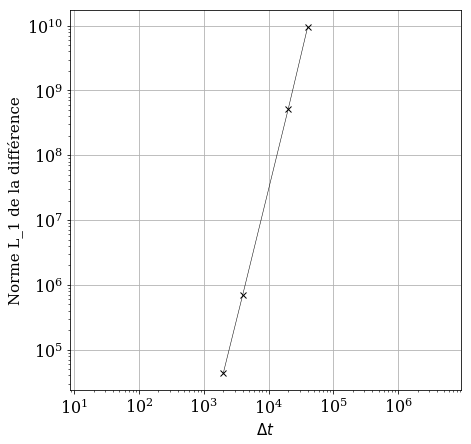

In [73]:
#On représente graphiquement la différence en norme en fonction du pas dt, en échelle logarithmique 
pyplot.figure(figsize=(7,7))
pyplot.grid(True)
pyplot.xlabel('$\Delta t$', fontsize=15)
pyplot.ylabel('Norme L_1 de la différence', fontsize=15)
pyplot.axis('equal')
pyplot.loglog(dt_values[:-1], diffgrid[:-1], color='k', ls='-', lw=0.5, marker='x');

On obsèrve bien une droite comme on devait s'y attendre. Plus le pas de temps dt devient petit, plus la norme $L_{1}$ de la différence diminue. 

L'ordre de convergence est donné par la formule suivante (Voir cours) : $$p=\frac{log(\frac{f_{3}-f_{2}}{f_{2}-f_{1}})}{log(r)}$$

où $r$ est une constante d'affinement, $f_{1}$ est la solution la plus précise et $f_{2},f_{3}$ sont 2 autres solutions moins précises (pas de temps dt plus grand). 

In [74]:
#Calcul de l'ordre de convergence de RK4 
r = 2
h = 4000.0

dt_values2 = numpy.array([h,r*h ,r**2*h])

u_values2 = numpy.empty_like(dt_values2, dtype=numpy.ndarray)

diffgrid2 = numpy.empty(2)

for i, dt in enumerate(dt_values2):
    
    N = int(T/dt) + 1   #nombre d'étapes de temps

    u = numpy.empty((N, 4))
    u[0] = numpy.array([vx0, vy0, x0, y0])

    for n in range(N-1):

        u[n+1] = rk4_step(u[n], f, dt)         
     
    u_values2[i] = u
    

#calcul f2 - f1
diffgrid2[0] = get_diffgrid(u_values2[1], u_values2[0], dt_values2[1])

#calcul f3 - f2
diffgrid2[1] = get_diffgrid(u_values2[2], u_values2[1], dt_values2[2])

# calculer l'ordre de convergence
p = (log(diffgrid2[1]) - log(diffgrid2[0])) / log(r)

print('Ordre de convergence est p=',p)

Ordre de convergence est p= 4.1037373486071775


Donc voit bien que l'ordre de convergence ici est proche de 4 comme on devait s'y attendre : en effet, la méthode RK4 est une méthode numérique d'ordre 4. 
__Remarque__ : l'ordre de convergence dépend fortement des pas de temps dt que l'on utilise. Plus on prend des pas de temps dt petit, moins on a de chance d'obtenir la valeur de convergence attendu. Ici nous avons pris des pas de temps assez élevés afin d'éviter les problème d'arrondissement de valeurs par l'ordinateur. Cela s'explique aussi par le fait que la méthode de RK4 est stable sous certaines conditions (décrite dans le lien suivant : https://fr.wikipedia.org/wiki/M%C3%A9thodes_de_Runge-Kutta : stabilité de la méthode).

# __Question 5:__

Regardons maintenant le problème où un astéroïde traverse le centre de l'éllipse avec une vitesse $(v_{x},v_{y})=(-500 m/s, 500 m/s)$ au moment où la lune se trouve à l'apogée de sa trajectoire. 
Pour se faire, on va résoudre les équations du mouvement pour notre nouveau système Terre-Lune-astéroïde(a). Comme pour le cas du système Terre-Lune, on a une équation différentielle vectorielle de la forme: $\overset{.}{w}=g(w)$.
Dans ce cas-ci, nous allons considérer la position relative de l'astéroïde par rapport à la Terre que nous notons $\vec{r}_{a}$ tel que : 

$$\vec{r}_{a}=\vec{x}_{a} - \vec{x}_{T}$$

et donc : $$\overset{..}{\vec{r}}_{a} = \overset{..}{\vec{x}}_{a} - \overset{..}{\vec{x}}_{T}$$

D'ailleurs, l'équation du mouvement pour l'astéroïde s'écrit: $$m_{a}\vec{a}_{a}=\vec{F}_{T}+\vec{F}_{L}$$  
où $m_{a}$ est la masse de l'astéroïde, $\vec{a}_{a}$ est le vecteur accélération de l'astéroïde, $\vec{F}_{T}$ est la force gravitationnelle que subit l'astéroïde dûe à la Terre et $\vec{F}_{L}$ est la force gravitationnelle que subit l'astéroïde dûe à la Lune. 

On obtient donc : 

$$\overset{..}{\vec{x}}_{a} = -\frac{G m_{T} \vec{r}_{a}}{\vec{r}_{a}^3} -\frac{G m_{L} (\vec{r}_{a}-\vec{r}_{L})}{(\vec{r}_{a}-\vec{r}_{L})^3}$$

Comme précédemment à l'exercice 1, on a : $$ \overset{..}{\vec{x}}_{L}= \frac{G m_{L} \vec{r}_{L}}{\vec{r}_{L}^3}$$

De la même manière que pour la question 1, lorsque l'on projette les équations sur les axes $x$ et $y$ on trouve: 

$$\overset{..}{x}_{a}=\overset{.}{v}_{x_{a}}=-\frac{G m_{T} x_{a}}{(x_{a}^2 + y_{a}^2)^{3/2}}-\frac{G  m_{L} (x_{a}-x_{L})}{((x_{a}-x_{L})^2+(y_{a}-y_{L})^2)^{3/2}} -\frac{G m_{L} x_{L}}{(x_{L}^2 + y_{L}^2)^{3/2}}$$ et $$\overset{..}{y_{a}}=\overset{.}{v}_{y_{a}}=-\frac{G m_{T} y_{a}}{(x_{a}^2 + y_{a}^2)^{3/2}}-\frac{G  m_{L} (y_{a}-y_{L})}{((x_{a}-x_{L})^2+(y_{a}-y_{L})^2)^{3/2}}-\frac{G m_{L} y_{L}}{(x_{L}^2 + y_{L}^2)^{3/2}}$$


où $x_{a}$ et $y_{a}$ sont les positions de l'astéroïde dans le repère où la Terre est au centre, $v_{x_{a}}$ et $v_{y_{a}}$ sont les vitesses de l'astéroïde, $x_{L}$ et $y_{L}$ sont les positions de la Lune dans ce même repère.

Ainsi, nous pouvons maintenant obtenir notre équation différentielle vectorielle $\overset{.}{w}=a(w)$ qui va être utile pour la résolution numérique :


$$ \overset{.}{w}= \begin{pmatrix} \overset{.}{v}_{x_{a}} \\ \overset{.}{v}_{y_{a}} \\ \overset{.}{x_{a}} \\ \overset{.}{y_{a}} \end{pmatrix} = \begin{pmatrix} -\frac{G m_{T} x_{a}}{(x_{a}^2 + y_{a}^2)^{3/2}}-\frac{G  m_{L} (x_{a}-x_{L})}{((x_{a}-x_{L})^2+(y_{a}-y_{L})^2)^{3/2}} -\frac{G m_{L} x_{L}}{(x_{L}^2 + y_{L}^2)^{3/2}} \\ -\frac{G m_{T} y_{a}}{(x_{a}^2 + y_{a}^2)^{3/2}}-\frac{G  m_{L} (y_{a}-y_{L})}{((x_{a}-x_{L})^2+(y_{a}-y_{L})^2)^{3/2}}-\frac{G m_{L} y_{L}}{(x_{L}^2 + y_{L}^2)^{3/2}} \\ v_{x_{a}} \\ v_{y_{a}} \end{pmatrix} = a(w) $$

Résolvons à présent ces équations à l'aide de la méthode de Runge-kutta-4.

Etant donné que l'on calcule la trajectoire de l'astéroïde à partir du moment où la Lune est à l'apogée de sa trajectoire, on doit prendre l'indice des positions de la Lune à cet endroit là pour nos conditions initiales:

In [75]:
z= numpy.where(x_rk4 == max(x_rk4))[0] #on récupère l'indice de la position de la Lune à l'apogée (on utilise la fonction max
                                       #qui permet de trouver la valeur maximale d'un tableau de valeurs)
                                       #on définit nos conditions initiales pour la Lune
x20 = max(x_rk4)  #position initiale en x de la lune pour ce second problème
y20 = y_rk4[z]    #position initiale en y de la lune pour ce second problème
vx20= vx_rk4[z]   #vitesse initiale en x de la lune pour ce second problème
vy20= vy_rk4[z]   #vitesse initiale en y de la lune pour ce second problème

In [76]:
#on définit nos conditions initiales pour l'astéroïde
vxa0= -500.0      #vitesse initiale en x de l'astéroïde
vya0= 500.0       #vitesse initiale en y de l'astéroïde
xa0=x_rk4[0]+a1   #position initiale en x de l'astéroïde: vu que l'astéroïde est au centre de l'ellipse au temps t=0, sa position
                  #est donnée par -r_min plus le demi grand axe a caclulé numériquement
ya0=0.0           # position initiale en y de l'astéroïde

On va redéfinir l'implémentation de RK4 pour la Lune et l'astéroïde:

In [77]:
def L(v):    #on définit une fonction L(v) qui sera utilisée pour appliquer RK4 à la trajectoire de la Lune 
             #Notons que "v" sera un vecteur qui contient les informations par rapport aux variables de la Lune
    vx2=v[0]
    vy2=v[1]
    x2 =v[2]
    y2 =v[3]
    
    return numpy.array([-(G*(MT+ML)*x2)/(x2**2 + y2**2)**(3/2),-(G*(MT+ML)*y2)/(x2**2 + y2**2)**(3/2),vx2,vy2])
    

In [79]:
def rk4L_step(v,L,dt):      #RK4 pour la Lune     
    
    r1=L(v)
    r2=L(v+ dt*0.5*r1)
    r3=L(v+dt*0.5*r2)
    r4=L(v+dt*r3)
    
    return v + dt*(1/6)*(r1 + 2*r2 + 2*r3 + r4) 

In [81]:
T=14*86400.0                  #on calcule sur un temps de 14 jours
dt=1.0
N=int(T/dt)+1

v_rk4L= numpy.empty((N,4))

v_rk4L[0] = numpy.array([vx20, vy20, x20, y20])

for n in range (N-1):
    v_rk4L[n+1]= rk4L_step(v_rk4L[n], L, dt)

In [82]:
#On séléctionne dans 2 tableaux les valeurs de x et y de la Lune
x_rk4L= v_rk4L[:,2] 
y_rk4L= v_rk4L[:,3]

In [83]:
def a(w):        #on définit une fonction a(w) qui sera utilisée pour appliquer RK4 à la trajectoire de l'astéroïde 
                 #Notons que "w" sera un vecteur qui contient les informations par rapport aux variables de l'astéroïde
    vxa=w[0]
    vya=w[1]
    xa =w[2]
    ya =w[3]
    
    return numpy.array([(-G*MT*xa)/((xa**2 + ya**2)**(3/2))
                        -(G*ML*(xa-x_rk4L[n]))/(((xa-x_rk4L[n])**2 + (ya-y_rk4L[n])**2)**(3/2))
                        -(G*ML*x_rk4L[n])/((x_rk4L[n]**2+y_rk4L[n]**2)**(3/2))
                        ,(-G*MT*ya)/((xa**2 + ya**2)**(3/2))
                        -(G*ML*(ya-y_rk4L[n]))/(((xa-x_rk4L[n])**2 + (ya-y_rk4L[n])**2)**(3/2))
                        -(G*ML*y_rk4L[n])/((x_rk4L[n]**2+y_rk4L[n]**2)**(3/2)), vxa, vya])

In [84]:
def rk4a_step(w,a,dt):      #RK4 pour l'astéroïde     
    
    p1=a(w)
    p2=a(w+ dt*0.5*p1)
    p3=a(w+ dt*0.5*p2)
    p4=a(w+ dt*p3)
    
    return w + dt*(1/6)*(p1 + 2*p2 + 2*p3 + p4) 

In [85]:
T=14*86400.0                  #on calcule sur un temps de 14 jours
dt=1.0
N=int(T/dt)+1

w_rk4a= numpy.empty((N,4))

w_rk4a[0] = numpy.array([vxa0, vya0, xa0, ya0])

for n in range(N-1):
    w_rk4a[n+1]= rk4a_step(w_rk4a[n], a, dt)

In [86]:
#On séléctionne dans 2 tableaux les valeurs de x et y de l'astéroïde
x_rk4a= w_rk4a[:,2] 
y_rk4a= w_rk4a[:,3]

Ci dessous, nous implémentons la trajectoire de la Lune et de l'astéroïde pour la période de 14 jours sur un graphique : 

(-2000000.0, 2000000.0)

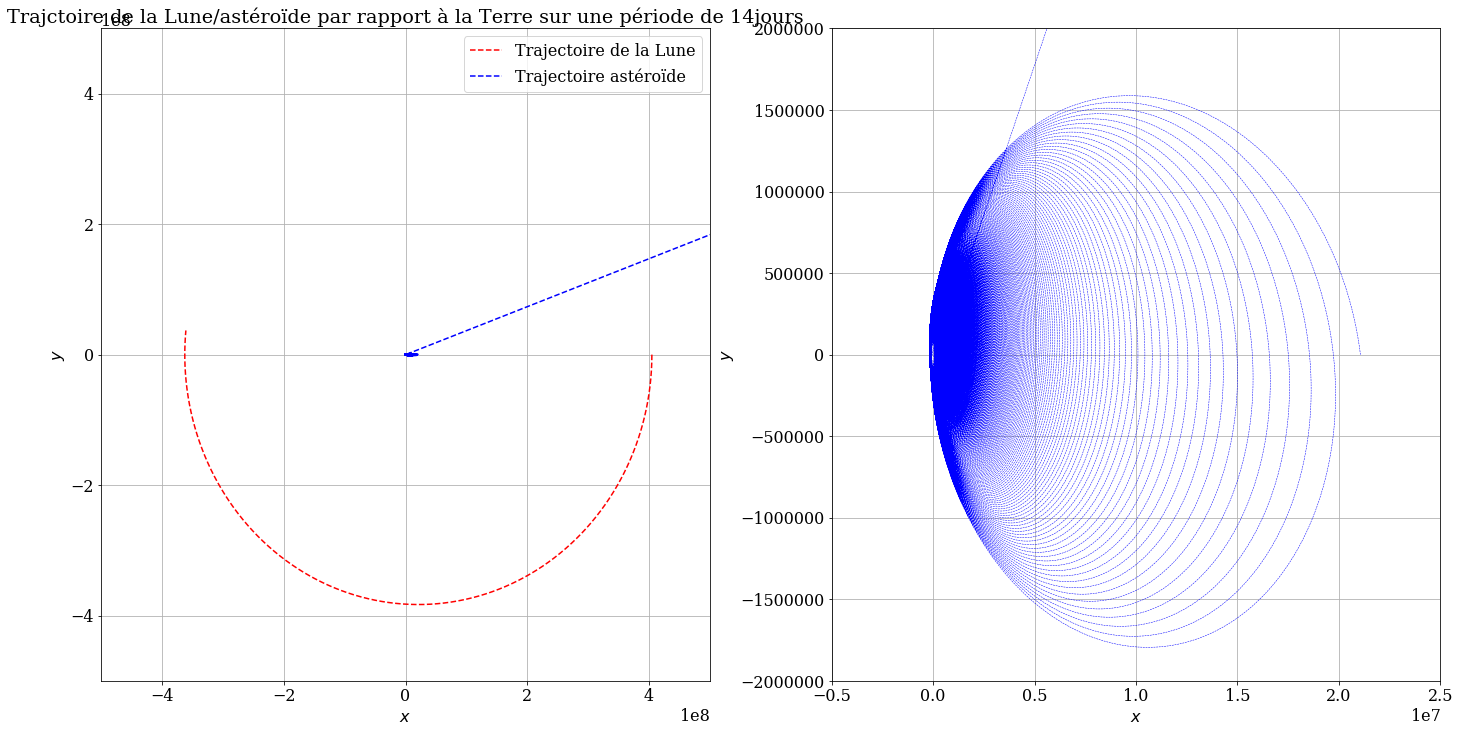

In [87]:
pyplot.figure(figsize=(24,12))
pyplot.subplot(121)         #nécessaire pour afficher 2 graphiques
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_rk4L, y_rk4L, 'r--', label='Trajectoire de la Lune')
pyplot.plot(x_rk4a, y_rk4a, 'b--', label='Trajectoire astéroïde')
pyplot.title('Trajctoire de la Lune/astéroïde par rapport à la Terre sur une période de 14jours')
pyplot.legend();
pyplot.xlim(-5.0*10**8,5.0*10**8)
pyplot.ylim(-5.0*10**8,5.0*10**8) 

#On va faire un zoom sur la trajectoire précise de l'astéroïde
pyplot.subplot(122)
pyplot.grid(True)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.plot(x_rk4a, y_rk4a, 'b--', lw=0.5)
pyplot.xlim(-5.0*10**6,2.5*10**7)
pyplot.ylim(-2.0*10**6,2.0*10**6)

Remarquons que l'astéroïde fait un certain nombre de tours autour de la Terre tout en se rapprochant, avant de dévier complètement et de s'en aller en mouvement rectiligne vers l'extérieur de l'ellipse. 
Ce mouvement ne serait pas possible en réalité car ici, nous considérons la Terre comme une particule ponctuelle alors que ce n'est PAS le cas, la Terre a un certain rayon $R_{T}$. Dans ce cas ci, l'astéroïde devrait normalement s'écraser sur la Terre. 

# __Question 6:__

Maintenant que nous avons tous les graphiques et toutes nos données, nous allons représenter des animations de nos trajectoires. 

__ Animation de la révolution complète de la Lune autour de la Terre : __

In [38]:
from matplotlib import animation    #on télécharge les outils nécessaires pour faire l'animation 
from IPython.display import HTML

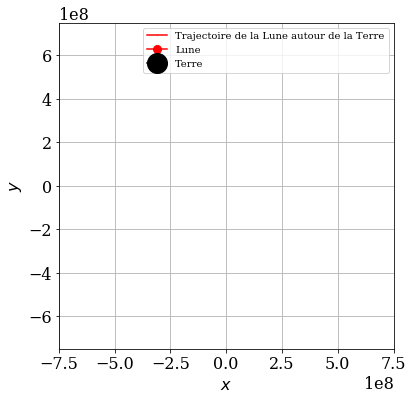

In [45]:
N=28*86400.0
N_animation=int(N/10000) + 1                    #On prend un N plus petit afin de réduire le temps de calcul
x_rk4_animation=numpy.empty(N_animation)
y_rk4_animation=numpy.empty(N_animation)
                        
for i in range (N_animation):                  #On créé des tableaux avec un nombre de valeurs plus petit afin de diminuer 
    x_rk4_animation[i]=x_rk4[i*10000]           #le temps de calcul
    y_rk4_animation[i]=y_rk4[i*10000]           #on prend 1 élément sur 1000 de notre tableau de valeur de départ

x_terre=numpy.zeros(N_animation)
y_terre=numpy.zeros(N_animation)

figanimationlune = pyplot.figure(figsize=(6,6))
ax=pyplot.axes(xlim=(-7.5*10**8,7.5*10**8), ylim=(-7.5*10**8,7.5*10**8))
linelunetirret=ax.plot([],[], color='r', marker='o', markersize=0.2)[0]
lineluneboule= ax.plot([], [], color='r', marker='o', markersize=8)[0]
lineterre=ax.plot([], [], color='k', marker='o', markersize=20)[0]
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
ax.legend(['Trajectoire de la Lune autour de la Terre', 'Lune', 'Terre'], prop={'size':10})
pyplot.grid(True)

def position_lune(i):
    linelunetirret.set_data(x_rk4_animation[0:i],y_rk4_animation[0:i])
    lineluneboule.set_data(x_rk4_animation[i], y_rk4_animation[i])
    lineterre.set_data(x_terre[i],y_terre[i]) 
    return linelunetirret,lineluneboule, lineterre

In [47]:
animlune = animation.FuncAnimation(figanimationlune, position_lune, frames=(N_animation), interval=50)

HTML(animlune.to_html5_video())

__ Animation de la trajectoire de l'astéroïde autour de la Terre :  __ 

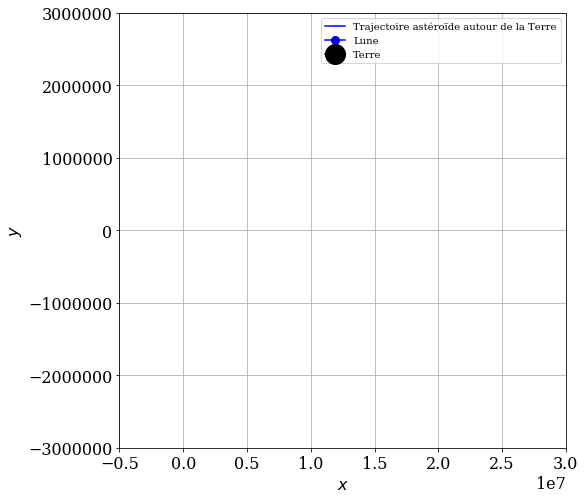

In [53]:
N=14*86400.0
N_animation=int(N/100) + 1
x_rk4a_animation=numpy.empty(N_animation)
y_rk4a_animation=numpy.empty(N_animation)

for i in range (N_animation):
    x_rk4a_animation[i]=x_rk4a[i*100]
    y_rk4a_animation[i]=y_rk4a[i*100]
    
x_terre=numpy.zeros(N_animation)
y_terre=numpy.zeros(N_animation)

figanimationaster = pyplot.figure(figsize=(8,8))
ax=pyplot.axes(xlim=(-5.0*10**6,3.0*10**7), ylim=(-3.0*10**6,3.0*10**6))
lineastertirret= ax.plot([],[], color='b', marker='o', markersize=0.2)[0]
lineasterboule= ax.plot([], [], color='b', marker='o', markersize=8)[0]
lineterre=ax.plot([], [], color='k', marker='o', markersize=20)[0]
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
ax.legend(['Trajectoire astéroïde autour de la Terre', 'Lune', 'Terre'], prop={'size':10})
pyplot.grid(True)

def position_aster(i):
    lineastertirret.set_data(x_rk4a_animation[0:i], y_rk4a_animation[0:i])
    lineasterboule.set_data(x_rk4a_animation[i], y_rk4a_animation[i])
    lineterre.set_data(x_terre[i],y_terre[i]) 
    return lineastertirret,lineasterboule, lineterre

In [ ]:
animaster = animation.FuncAnimation(figanimationaster, position_aster, frames=(N_animation), interval=100)

HTML(animaster.to_html5_video())